In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array

In [2]:
img_path = '/content/harrypotter.jpg'
img = load_img(img_path)

In [3]:
img_array = img_to_array(img)

In [4]:
img_array = img_array.reshape((1,) + img_array.shape)

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [6]:
augmented_images = datagen.flow(img_array, batch_size=1)

In [7]:
def visualize_augmentation_images(generator,num_images):
  fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
  for i in range(num_images):
    batch = next(generator)
    aug_image = batch[0]
    axes[i].imshow(aug_image)
    axes[i].axis('off')
plt.show()

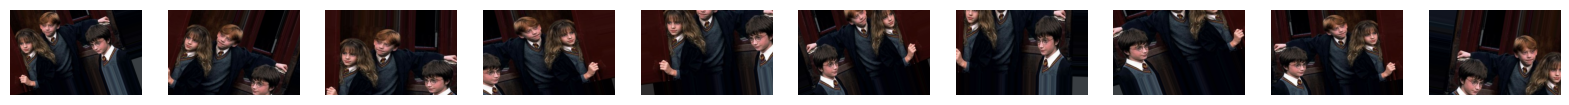

In [8]:
visualize_augmentation_images(augmented_images,10)

In [14]:
import matplotlib.pyplot as plt

def original_augmented(generator, num_pairs=3):
    fig, axes = plt.subplots(num_pairs, 2, figsize=(10, 5 * num_pairs))

    # Ensure axes is always 2D, even if num_pairs = 1
    if num_pairs == 1:
        axes = [axes]

    # Get the original image and normalize it
    original = img_array[0] / 255.0  # Assuming img_array is a batch

    for i in range(num_pairs):
        # Get augmented image
        batch = next(generator)  # generator should yield batches
        aug_image = batch[0]     # Get the first image in the batch

        # Plot original image
        axes[i][0].imshow(original)
        axes[i][0].set_title('Original')
        axes[i][0].axis('off')

        # Plot augmented image
        axes[i][1].imshow(aug_image)
        axes[i][1].set_title('Augmented')
        axes[i][1].axis('off')

    plt.tight_layout()
    plt.show()


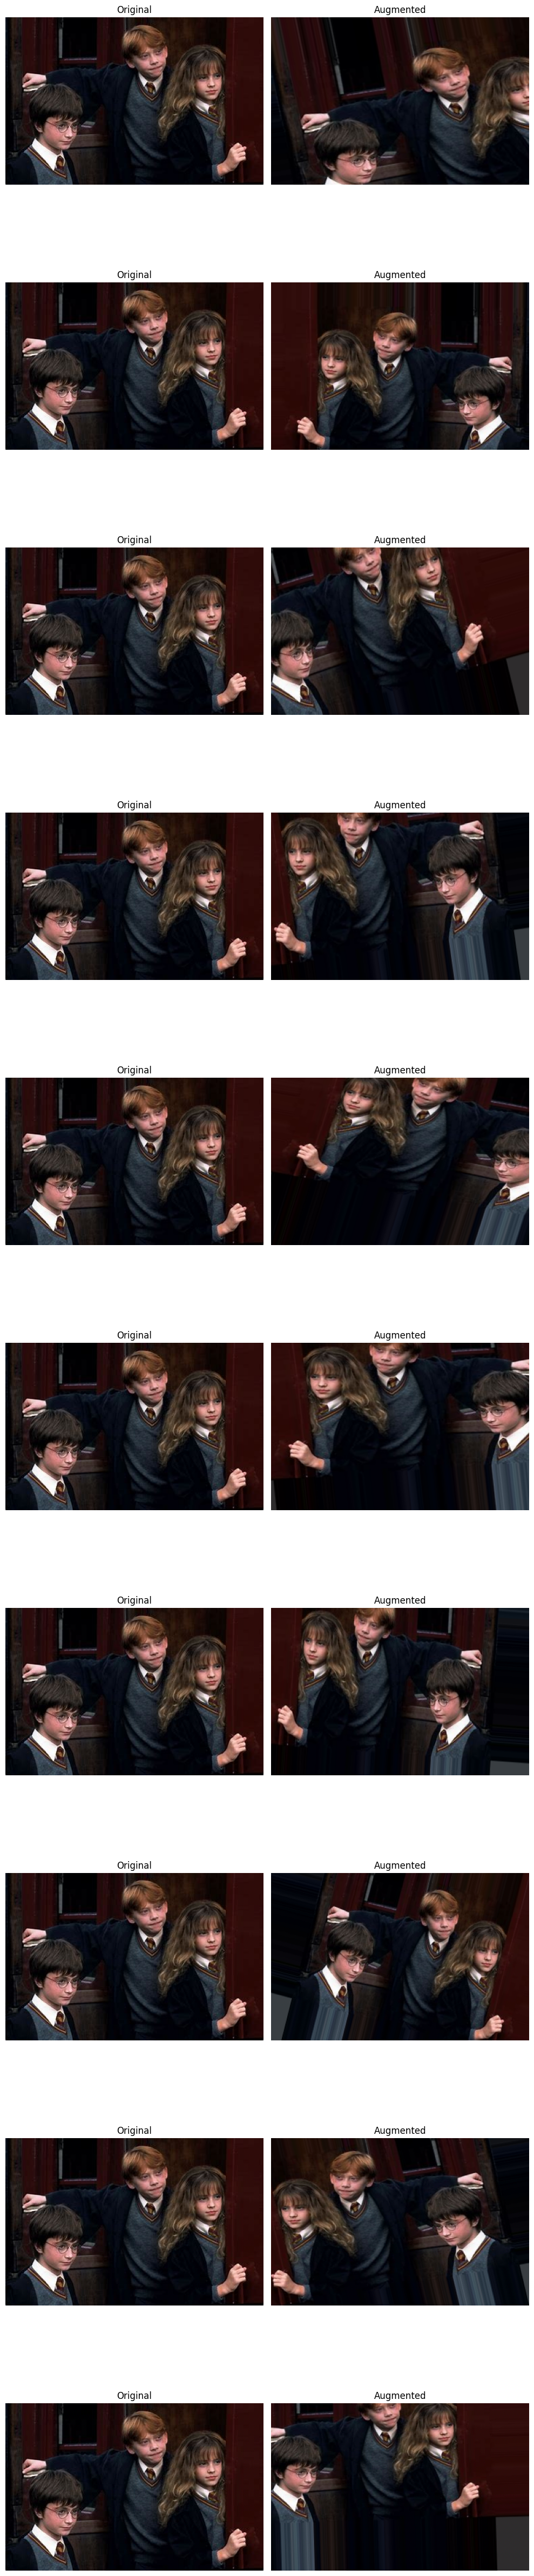

In [15]:
original_augmented(augmented_images,num_pairs=10)